Demonstration of a simple implementation of gradient descent.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autograd import numpy as np
from autograd import grad
from matplotlib import pyplot as plt

$f(x_1, x_2) = x_1^2 + x_2^2 + sin(x_1 + 1.5) - 2 sin(x_2) + x_2$

In [3]:
def func(x):
    return x[0]**2 + x[1]**2 + np.sin(x[0] + 1.5) - 2 * np.sin(x[1]) +  x[1]

func_grad = grad(func)

In [4]:
domain_xy = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))

func_z = func(domain_xy)

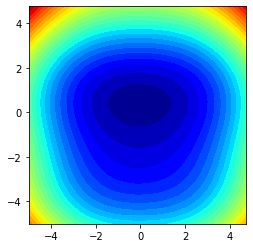

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.contourf(domain_xy[0], domain_xy[1], func_z, cmap='jet', levels=30)

plt.show()

In [6]:
def gradient_descent(grad_func, x_start, n_iter, step):
    
    x = x_start
    x_history = []
    
    for _ in range(n_iter):

        x_history.append(np.copy(x))
        
        diff = -step * grad_func(x)
        x += diff
        
    return np.array(x_history)

In [7]:
x_h = gradient_descent(
    func_grad, 
    x_start=np.array([4., -4.]),
    n_iter=50,
    step=0.2
)

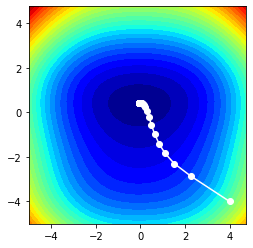

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.contourf(domain_xy[0], domain_xy[1], func_z, cmap='jet', levels=30)

plt.plot(x_h[:, 0], x_h[:, 1], 'wo-')

plt.show()